In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf # model train
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
if not os.path.exists("Dataset.zip"):
  !gdown 1jYcu7gHFrYiEDEk1Ptpw8OBuE7TAClOr
if not os.path.exists("Dataset"):
  !unzip Dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1jYcu7gHFrYiEDEk1Ptpw8OBuE7TAClOr
To: /content/Dataset.zip
 22% 34.1M/155M [00:00<00:02, 60.3MB/s]Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/gdown/download.py", line 257, in download
    for chunk in res.iter_content(chunk_size=CHUNK_SIZE):
  File "/usr/local/lib/python3.7/dist-packages/requests/models.py", line 751, in generate
    for chunk in self.raw.stream(chunk_size, decode_content=True):
  File "/usr/local/lib/python3.7/dist-packages/urllib3/response.py", line 496, in stream
    data = self.read(amt=amt, decode_content=decode_content)
  File "/usr/local/lib/python3.7/dist-packages/urllib3/response.py", line 444, in read
    data = self._fp.read(amt)
  File "/usr/lib/python3.7/http/client.py", line 465, in read
    n = self.readinto(b)
  File "/usr/lib/python3.7/http/client.py", line 509, in readinto
    n = self.fp.readinto(b)
  File "/usr/lib/python3.7/socket.py", line 589, in readinto
  

In [ ]:
x = []
y = []
getindex = {"notumor": 0, "glioma": 1, "meningioma": 2, "pituitary": 3}
for i in os.listdir("Dataset"):
    dir = os.path.join("Dataset", i)    
    if os.path.isdir(dir):
        for j in os.listdir(dir):
            file = os.path.join(dir, j)
            if os.path.isfile(file):
                image = cv2.imread(file, 0)     
                image = cv2.resize(image, (150, 150), interpolation=cv2.INTER_CUBIC)
                image = np.expand_dims(image, -1)
                x.append(image)
                y.append(getindex[i])
x = np.array(x)
y = np.array(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# y_train_cat=tf.keras.utils.to_categorical(y_train,num_classes=4)
# y_test_cat=tf.keras.utils.to_categorical(y_test,num_classes=4)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3),  padding="same", activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.summary()
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [ ]:
model.fit(
    x=x_train, 
    y=y_train, 
    batch_size=32, 
    epochs=25, 
    validation_data=(x_test, y_test)
)

Epoch 1/25
176/176 [==============================] - 13s 21ms/step - loss: 10.2154 - accuracy: 0.7083 - val_loss: 0.4284 - val_accuracy: 0.8406
Epoch 2/25
176/176 [==============================] - 3s 19ms/step - loss: 0.2997 - accuracy: 0.8946 - val_loss: 0.3308 - val_accuracy: 0.8833
Epoch 3/25
176/176 [==============================] - 3s 20ms/step - loss: 0.1735 - accuracy: 0.9373 - val_loss: 0.2770 - val_accuracy: 0.9032
Epoch 4/25
176/176 [==============================] - 3s 18ms/step - loss: 0.1136 - accuracy: 0.9578 - val_loss: 0.2705 - val_accuracy: 0.9125
Epoch 5/25
176/176 [==============================] - 3s 18ms/step - loss: 0.0814 - accuracy: 0.9751 - val_loss: 0.2136 - val_accuracy: 0.9310
Epoch 6/25
176/176 [==============================] - 3s 18ms/step - loss: 0.0678 - accuracy: 0.9774 - val_loss: 0.2466 - val_accuracy: 0.9431
Epoch 7/25
176/176 [==============================] - 3s 18ms/step - loss: 0.0466 - accuracy: 0.9859 - val_loss: 0.2730 - val_accuracy: 0.92

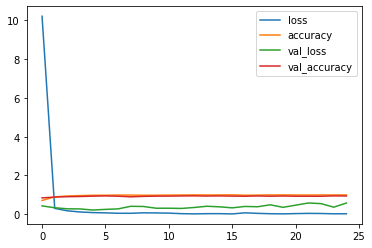

In [ ]:
history = model.history.history
for key, val in history.items():
    plt.plot(np.arange(len(val)), val, label=key)
plt.legend(loc="upper right")
plt.show()

In [ ]:
model.save("model.h5")

In [ ]:
pred_y = model.predict(x)

220/220 [==============================] - 1s 6ms/step


In [ ]:
image = cv2.imread("Dataset/meningioma/Tr-me_1184.jpg", 0)
image = cv2.resize(image, (150, 150), interpolation=cv2.INTER_CUBIC)
image = np.expand_dims(image, -1)
output = model.predict(np.array([image]))
print("The probability of tumour type : ")
print(output)
print("The tumour type is : ")
ind = np.argmax(output, axis = 1)
if(ind==0):
  print("No_tumor")
elif(ind==1):
  print("Glioma -- Type 1")
elif(ind==2):
  print("Meningioma -- Type 2")
else:
  print("Pituitary -- Type 3")

1/1 [==============================] - 0s 16ms/step
The probability of tumour type : 
[[2.0187247e-08 8.3168406e-06 9.9999166e-01 6.9537319e-12]]
The tumour type is : 
Meningioma -- Type 2


In [ ]:
cm = confusion_matrix(y, np.argmax(pred_y, axis=1))
print(cm)

[[1991    0    3    6]
 [  10 1562   44    5]
 [  21   13 1605    6]
 [   0    0    2 1755]]
